# Introduction à la Science des données


## Travail pratique 02 – Outils pour le calcul scientifique II 


### Table des matières

[Analyse des données socio-économiques](#Analyse-des-données-socio-économiques)

[- Bases](#Bases)

[- Histogrammes](#Histogrammes)

[- Manipulations des données](#Manipulations-des-données)

[- Manipulations et graphiques](#Manipulations-et-graphiques)






**Professeurs**: Carlos Peña et Stephan Robert

**Assistant(s)**: Thibault Schowing

**Contact**: prenom.nom@heig-vd.ch ou de préférence via Teams pout l'assistant

**Rendu**:
- Date: 07.11.2022, 23h55

- Modalité: Travail individuel. Une fois complété, rendez directement le notebook nommé correctement comme suit "**TP2_ISD_SA2022_Nom_Prenom.ipynb**" en remplaçant Nom et Prenom par les votres, y compris ci-dessous, puis uploader votre fichier sur Cyberlearn.

- Les questions sont généralement indiquées en **gras** ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "*Réponse:*" pour les réponses textuelles. 
- Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre.

- Note: Ce TP est noté sur 6, pour un poids de 5%

**Étudiant**:
- Quentin Surdez

<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Se familiariser avec la bibliothèque Pandas de gestion et traitement des dataframes.
- Mise en pratique de l'analyse et la caractérisation simple des attributs d’une base de données.



<div class="alert alert-block alert-info">
<b>Aide - Différentes Cheatsheets recommandées pour accompagner le TP.  </b>
</div>

N'oubliez pas que vous pouvez retourner vers le TP1 si vous avez des questions sur Python, Numpy, Pandas ou Matplotlib. 

- [Data wrangling with Pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib cheatscheets](https://matplotlib.org/cheatsheets/)



<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn ou  un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>


### 1.	Analyse des données socio-économiques

La fondation gapminder fondée par Hans Rosling et famille, fournit une base de données sur les pays, des outils d’analyse et des études d’analyse socio-économique très intéressantes. Les petits sets de données que nous allons utiliser peuvent sembler insignifiants mais une analyse objective et factuelle des données, comme le promeut la [fondation Gapminder](https://www.projectrosling.ch/fr/concept/), peut rapidement changer votre perception du monde !

Nous allons utiliser une petite base de données contenant la population, l’espérance de vie et le PIB par habitant pour différents pays du monde de 1952 à 2007, pour faire quelques analyses.

**N'hésitez pas à ouvrir votre TP1 pour avoir les quelques bases à portée de vue pour vous aider dans ce labo et les suivants !**


- Dans l'environnement Anaconda utilisé par Jupyter (l'environnement que vous avez inscrit comme kernel), commencez par importer le module gapminder avec pip: *pip install gapminder*. Une fois installé ce module, vous aurez accès à un dataframe appelé gapminder. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gapminder import gapminder


# Pour plus de clareté et pour la tradition, on appelle notre DataFrame "df" 
df = gapminder

___
**1.1) Utilisez les méthodes head(), describe() et info() pour vous familiariser avec le DataFrame.**

In [3]:
# Utilisez la méthode head()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# Utilisez la méthode describe()
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [5]:
# Utilisez la méthode info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


**1.2) Décrivez brièvement le contenu du dataset. Quelles sont les données présentes ? Que signifient-elles ?**

(2 points)


*Réponse:*

Le dataset se compose 6 colonnes avec comme données, le pays, le continent, l'année, l'espérance de vie, la population et le PIB par habitant. 

    l'espérance de vie permet de savoir jusqu'à quel âge moyen les personnes vivent, le PIB par habitant est un paramètre pouvant représenter la croissance d'un pays au fil du temps.

**1.3) Décrivez le contenu des résultats renvoyés par les trois méthodes ci-dessus:**

(3 points)

*Description head():*

Head permet de voir les premières lignes avec toutes les colonnes de notre DataFrame


*Description describe():*

Describe permet d'avoir des informations statistiques pour chaque colonne, comme la moyenne des valeurs contenues ou les différents quartiles


*Description info():*

Info nous donne la class de l'objet, son range, le nombre de colonnes. Pour chaque colonne, nous avons les types des variables qui y sont inclues

<div class="alert alert-block alert-info">
<b>Corrections: </b> Points obtenus: /5
</div>

Remarques: 

___
### Histogrammes

**2.1) Utilisez la commande *pandas.DataFrame.hist(df)* ci-dessous pour vous faire une idée plus précise des valeurs dans la base de données.** 

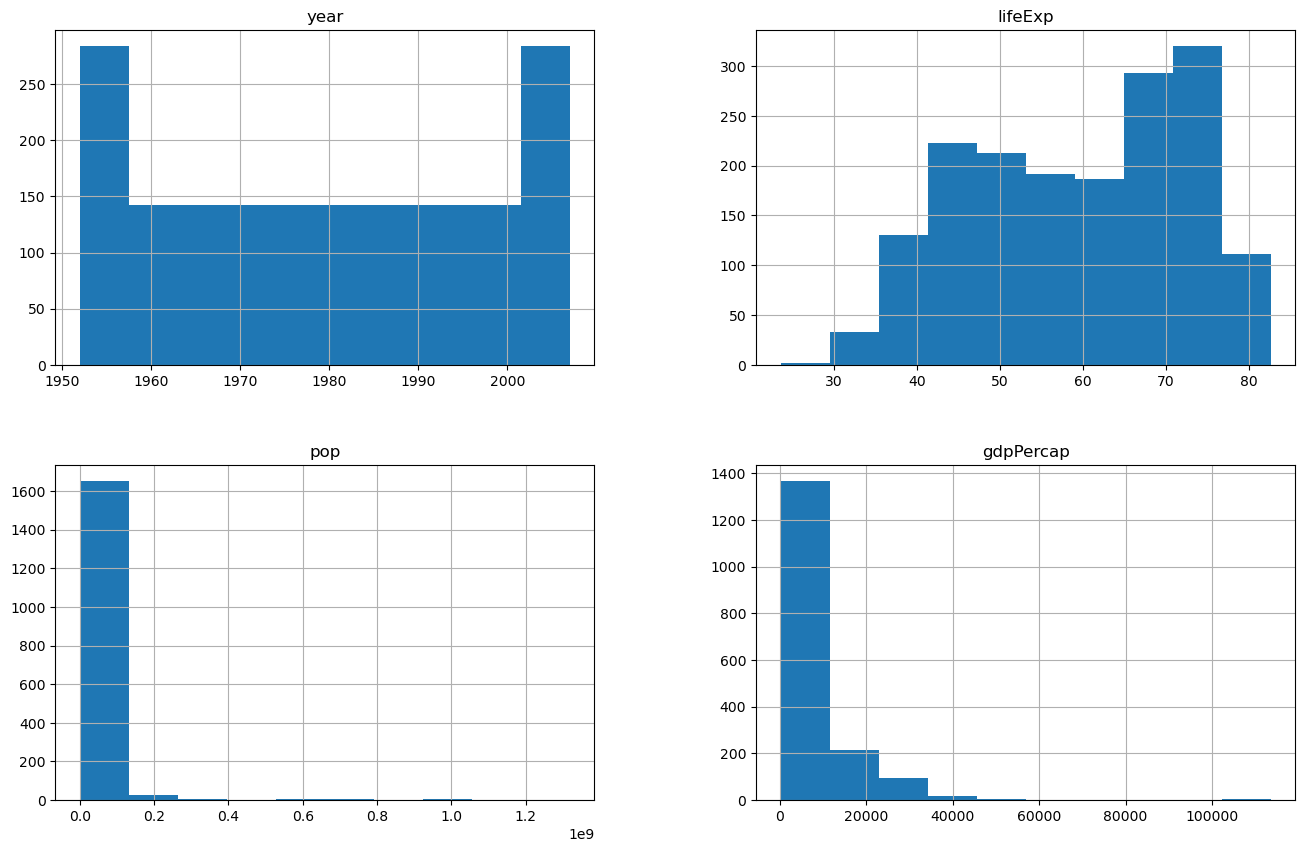

In [6]:
# Observez bien la notation utilisée et comment s'utilise la fonction "pandas.DataFrame.hist(df)"
# On ajoute la taille de figure en paramètres pour plus de clareté.

df.hist(figsize=(16, 10));

**2.2) Décrivez rapidement les quatre histogrammes ci-dessus. Que remarquez-vous avec l'histogramme représentant la variable "year" ?** 

(3 points)

*Réponse:*

Le graphe lifeExp permet de voir la répartition des années de vie moyenne selon une donnée. 

On peut voir les barres de population surtout vers le début entre 0.0 et 0.2 1e9

Le gdpPercap descend après 3 barres en étant très haut au début

Le graphe des années est particulier avec deux barres hautes puis des autres au même niveau

**2.3) Exécutez le code ci-dessous puis répondez aux questions suivantes:**

(2 points)

- Que représente le paramètre "bins" ? Aidez-vous de [la doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) si nécessaire.

*Réponse:*

Bin est le nombre de bin/barre introduit dans le graphique

- Quelle conclusion pouvez vous tirer concernant la représentation de la variable "year" dans le dataset ?

*Réponse:*

Cette variable possède souvent les mêmes valeurs, ou possède des valeurs proches les unes des autres


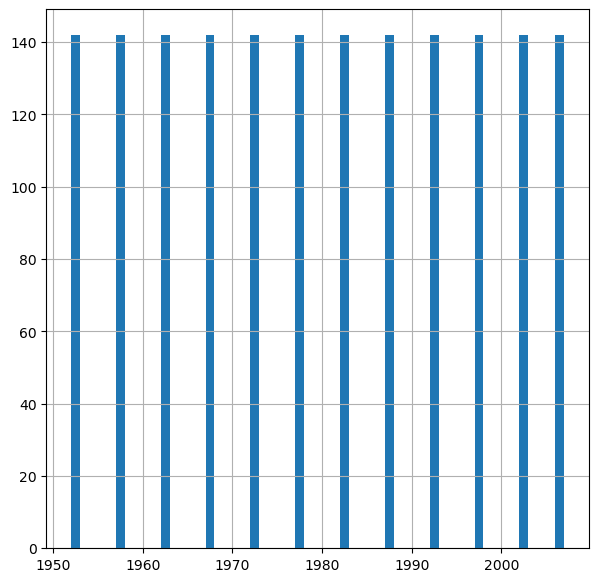

In [7]:
# Code question 2.3
df["year"].hist(figsize=(7, 7), bins = 55);

<div class="alert alert-block alert-info">
<b>Corrections: </b> Points obtenus: /5
</div>

Remarques: 

___

### Manipulations des données

**3.1) Trouvez combien d’observations il y a par pays et par année (c.a.d., combien de données par pays et par année) et vérifiez s’il y a des données manquantes.** 

(3 points)

Pour vérifier s'il y a des données manquantes, vérifiez simplement qu'aucun pays/année n'a moins de données que les autres. Ecrivez vos conclusions dans la cellule ci-après. 

Pour cela, utilisez les fonctions: *groupby()* avec comme paramètres "year" et "country" puis *size()* pour avoir la taille. Observez en premier à quoi ressemble le résultat de ces deux fonctions puis enchaînez avec *describe()* afin d'en tirer des conclusions. 

Regardez les exemples de [la doc pour la fonction groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) afin de voir comment **chaîner les méthodes**.

In [8]:
# Écrivez votre code ici. Note: une seule ligne suffit. 
# df.groupby(["year"]).size().describe(), df.groupby(["country"]).size().describe()
# df.groupby(["country"]).count()
df.groupby(["year", "country"]).size().describe()


count    1704.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

**3.2) Combien de mesures ont été faites par année ? (pas besoin d'utiliser *describe()*)**

(2 points)

In [9]:
# Écrivez votre code ici. Note: une seule ligne suffit. 
df.groupby(["year"]).size()


year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64

**3.3) Que pouvez-vous conclure concernant les donneés manquantes:**

(1 point)

*Réponse:* Il n'y en a pas ? ... oulala pas sûr aha

___
**3.4) Listez les valeurs uniques présentes dans les colonnes ‘continent’, ‘country’, et ‘year’. Utilisez la méthode *unique()*.** 

(3 points)

Aide: vous pouvez utiliser *df['Nom Colonne']* ou *df.loc[:,'Nom colonne']* pour retourner directement le contenu d'une colonne. 

In [10]:
# Écrivez votre code ici. Note: une seule ligne suffit par colonne. Affichez vos résultats dans des cellules différentes.  

# Continent
df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [11]:
# Country
df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [12]:
# Year
df["year"].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

<div class="alert alert-block alert-info">
<b>Corrections: </b> Points obtenus: /9
</div>

Remarques: 

___

### Manipulations et graphiques

**4.1) Calculez la moyenne de l’espérance de vie de tous les pays en 1952 et en 2007. Générez un bar chart permettant la comparaison de ces moyennes.**

(5 points)

Pour sélectionner les données des bonnes années, regardez les [exemples de la doc ("Getting values")](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) pour vous aider à comprendre comment faire à l'aide de conditions. 


Une fois que vous avez un nouveau DataFrame avec uniquement les données de 1952 et 2007, gardez uniquement les colonnes d'intérêt (year et lifeExp), groupez les données par année et calculez la moyenne de l'espérence de vie. Une fois ceci fait, utilisez la fonction ```df.plot.bar()``` 

Aide: vous pouvez utiliser plusieur .loc[] d'affilée, une fois pour choisir les années, et une fois pour choisir les colonnes d'intérêt. **Regardez l'exemple ci-dessous pour vous aider**.

Notes: toutes ces opérations peuvent être effectuées à la chaîne, en une seule ligne. Si vous souhaitez faire cela petit à petit, n'oubliez pas d'enregistrer vos résultats intermédiaires dans une variable: ``` tmp_df = df.loc["exemple"]```. **Vous pouvez créer des cellules supplémentaires si vous l'estimez nécessaire.**




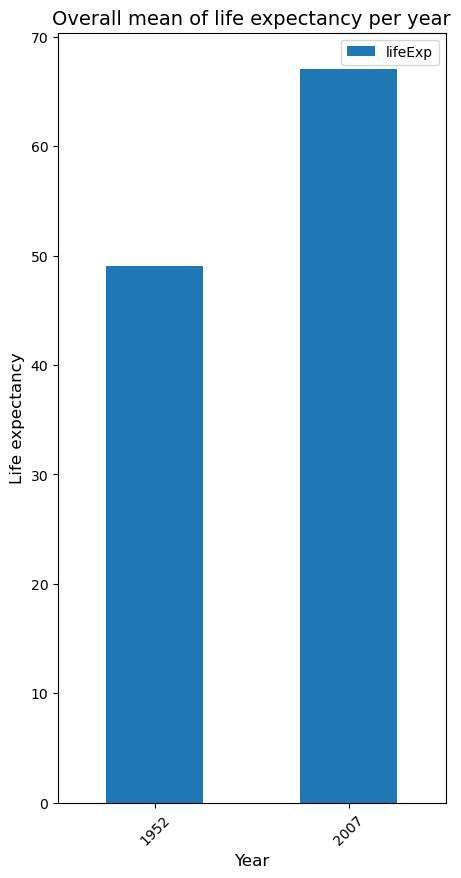

In [13]:
# Écrivez votre code ici
# df.head(), df["lifeExp"], df["year"]

# values = [1952, 2007]
# df_y = pd.DataFrame(values, columns=["year"])
# df_y.head()

df_new = df[["year", "lifeExp"]]

# df_new.loc[df_new["year"] == 1952].append(df_new.loc[df_new["year"] == 2007])

# .loc[df_new["year"].isin([1952, 2007])]

ax = (df_new
      .loc[df_new["year"].isin([1952, 2007])]
      .groupby("year")
      .mean('lifeExp')
      .plot.bar(rot=45, figsize=(5, 10))
      )
ax.set_title('Overall mean of life expectancy per year', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Life expectancy', fontsize=12);




Ci-dessous, un petit **exemple** qui utilise le "method chaining". Cette notation, qui profite du fait que chaque methode Pandas retourne un DataFrame auquel on peut appliquer une nouvelle méthode, augmente grandement la lisibiltié du code. Vous trouvez une section avec un exemple sur [La cheat sheet "Data wrangling with Pandas"](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). 

>Most pandas methods return a DataFrame so that another pandas method can be applied to the result. This improves readability of code.


En plus de chaîner les méthodes, le graphique est rendu beaucoup plus lisible en y ajoutant des axes bien nommés, un titre et des labels inclinés. Libre à vous de vous inspirer de cet exemple pour l'exercice 5. 

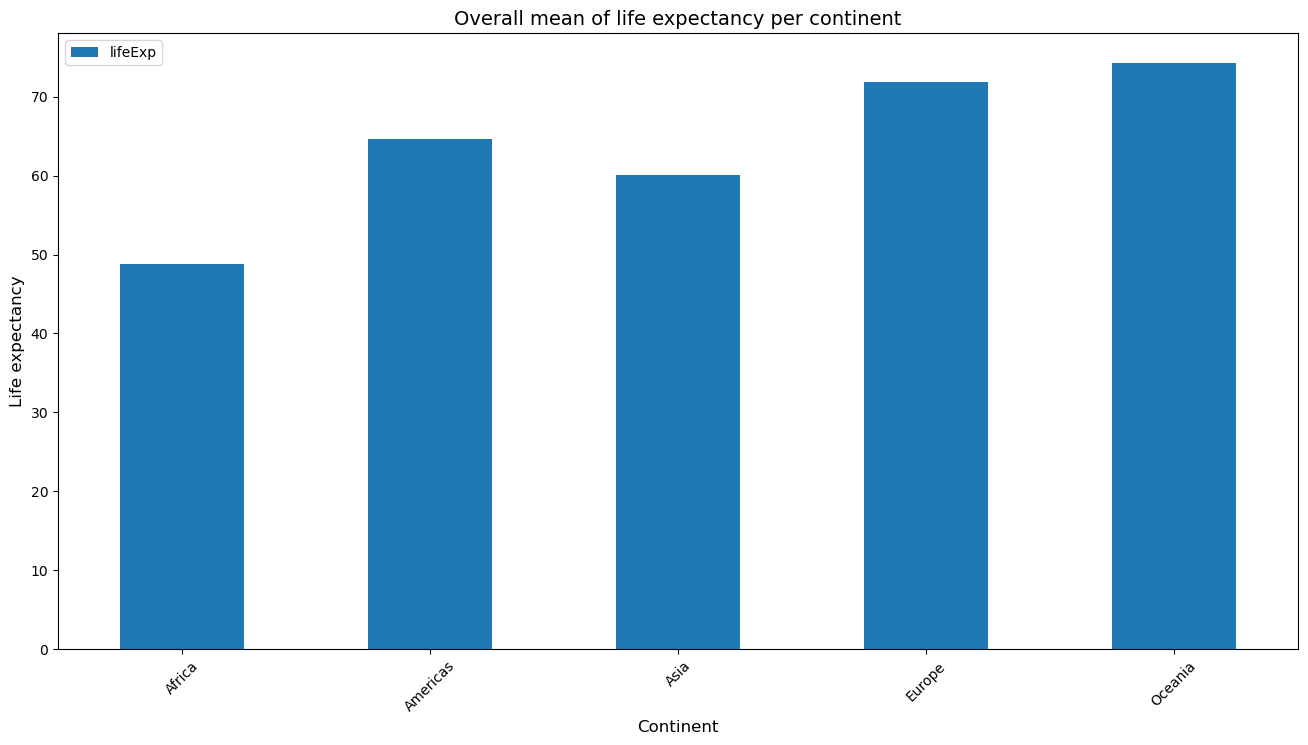

In [14]:
# Exemple

ax = (df
      .loc[:, ['continent', 'lifeExp']]
      .groupby('continent')
      .mean('lifeExp')
      .plot.bar(rot=45, figsize=(16, 8))
      )
ax.set_title('Overall mean of life expectancy per continent', fontsize=14)
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Life expectancy', fontsize=12);


___


**4.2) Calculez la moyenne de l’espérance de vie des pays par continent en 1952 et en 2007. Générez un bar chart permettant la comparaison de ces moyennes.**

(5 points)

Comme pour l'exercice précédent, vous devez transformer vos données avant de les afficher. Ici vous devez grouper sur deux niveaux: par année puis par continent. Le graphique final aura un aspect similaire à celui ci-dessus, avec deux barres par continent: une pour 1952 et une pour 2007.

Pour avoir le format de données attendu pour générer l'histogramme ( Continent | 1952 | 2007 ) voous devrez utiliser la fonction [unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html). Lisez rapidement la documentation pour en comprendre le sens puis transformez vos données ci-dessous. On vous conseille de lire [cet article de la documentation](https://pandas.pydata.org/docs/user_guide/reshaping.html) pour bien comprendre les différentes manipulations appliquées aux données. Des exemples avec images permettent une bonne compréhension, spécialement pour la fonction *unstack()* qui peut être un peu abstraite au début. 


**Note:** dans la cellule à compléter ci-dessous, le résultat n'est pas affecté à une variable mais uniquement affiché en sortie pour tester le code. Pour affecter le résultat remplissez la cellule d'après comme indiqué, avec le résultat de vos essais. 



In [15]:
# Testez votre code ici (qui ne fait qu'afficher le dataFrame transformé). Profitez de "jouer" avec les différentes fonctions.

#df_new = df[["continent", "year", "lifeExp"]]
#df_new = df_new.loc[df_new["year"].isin([1952, 2007])]

(df
 .loc[df["year"].isin([1952,2007])]
 #.query()                           # Vous pouvez utiliser query() ou loc[] selon vos préférences
 .groupby(["continent", "year", "lifeExp"])
 .mean("lifeExp")
 .unstack()                         # Testez la fonction unstack() 
 )

pop                                             \
lifeExp            28.801    30.000     30.015     30.331     31.286   
continent year                                                         
Africa    1952        NaN  284320.0  4232095.0  2143249.0  6446316.0   
          2007        NaN       NaN        NaN        NaN        NaN   
Americas  1952        NaN       NaN        NaN        NaN        NaN   
          2007        NaN       NaN        NaN        NaN        NaN   
Asia      1952  8425333.0       NaN        NaN        NaN        NaN   
          2007        NaN       NaN        NaN        NaN        NaN   
Europe    1952        NaN       NaN        NaN        NaN        NaN   
          2007        NaN       NaN        NaN        NaN        NaN   
Oceania   1952        NaN       NaN        NaN        NaN        NaN   
          2007        NaN       NaN        NaN        NaN        NaN   

                                                                      ...  \
lifeExp            31.975    32.500     32.548     32.978     33.609  ...   
continent year                                                        ...   
Africa    1952  4469979.0  580653.0        NaN  2526994.0  2664249.0  ...   
          2007        NaN       NaN        NaN        NaN        NaN  ...   
Americas  1952        NaN       NaN        NaN        NaN        NaN  ...   
          2007        NaN       NaN        NaN        NaN        NaN  ...   
Asia      1952        NaN       NaN  4963829.0        NaN        NaN  ...   
          2007        NaN       NaN        NaN        NaN        NaN  ...   
Europe    1952        NaN       NaN        NaN        NaN        NaN  ...   
          2007        NaN       NaN        NaN        NaN        NaN  ...   
Oceania   1952        NaN       NaN        NaN        NaN        NaN  ...   
          2007        NaN       NaN        NaN        NaN        NaN  ...   

                  gdpPercap                                                   \
lifeExp              80.653      80.657      80.745       80.884      80.941   
continent year                                                                 
Africa    1952          NaN         NaN         NaN          NaN         NaN   
          2007          NaN         NaN         NaN          NaN         NaN   
Americas  1952          NaN         NaN         NaN          NaN         NaN   
          2007  36319.23501         NaN         NaN          NaN         NaN   
Asia      1952          NaN         NaN         NaN          NaN         NaN   
          2007          NaN         NaN  25523.2771          NaN         NaN   
Europe    1952          NaN         NaN         NaN          NaN         NaN   
          2007          NaN  30470.0167         NaN  33859.74835  28821.0637   
Oceania   1952          NaN         NaN         NaN          NaN         NaN   
          2007          NaN         NaN         NaN          NaN         NaN   

                                                                    \
lifeExp              81.235       81.701       81.757       82.208   
continent year                                                       
Africa    1952          NaN          NaN          NaN          NaN   
          2007          NaN          NaN          NaN          NaN   
Americas  1952          NaN          NaN          NaN          NaN   
          2007          NaN          NaN          NaN          NaN   
Asia      1952          NaN          NaN          NaN          NaN   
          2007          NaN          NaN          NaN  39724.97867   
Europe    1952          NaN          NaN          NaN          NaN   
          2007          NaN  37506.41907  36180.78919          NaN   
Oceania   1952          NaN          NaN          NaN          NaN   
          2007  34435.36744          NaN          NaN          NaN   

                             
lifeExp              82.603  
continent year               
Africa    1952          NaN  
          2

In [16]:
# Ajoutez votre code ici pour créer le dataFrame df_life_exp. Sans modification il sera égal à df

df_life_exp = (df
 .loc[df["year"].isin([1952, 2007])]
 #.query() / loc[]
 .groupby(["continent", "year"])
 .mean("lifeExp")["lifeExp"]
 .unstack()
 )

df_life_exp.head()

year,1952,2007
continent,,
Africa,39.135500,54.806038
Americas,53.279840,73.608120
Asia,46.314394,70.728485
Europe,64.408500,77.648600
Oceania,69.255000,80.719500


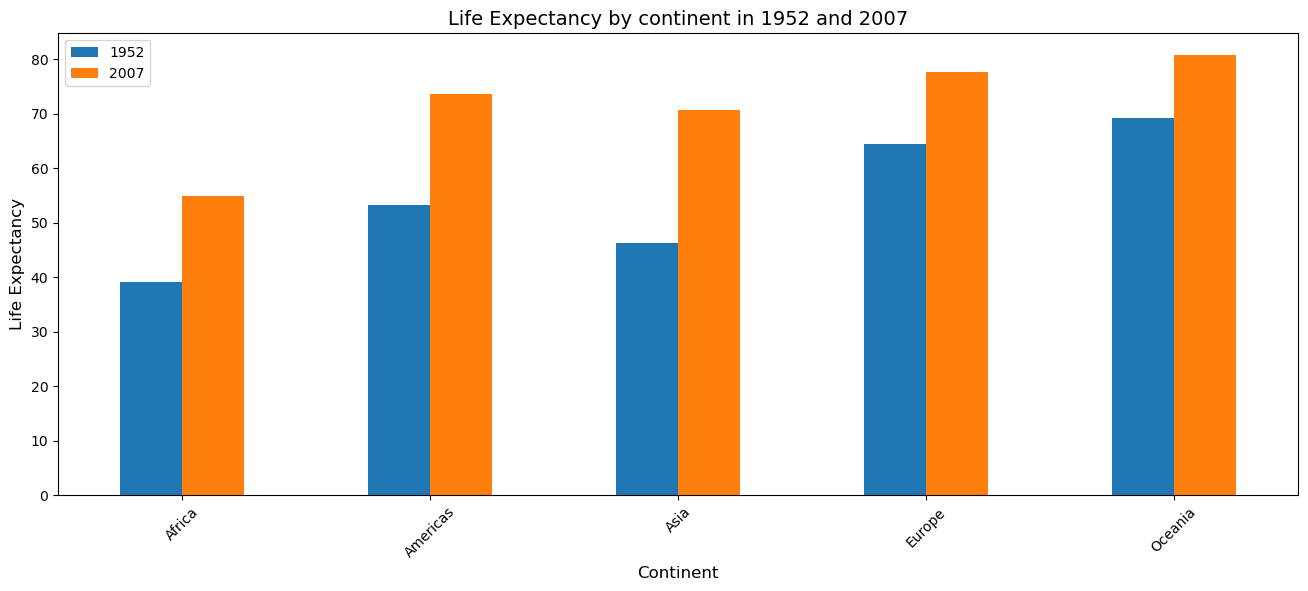

In [17]:
# Exécutez cette cellule pour afficher le graphique une fois df_life_exp formaté correctement.

# Barplot des deux années, par continent
ax = (df_life_exp
      .plot.bar(rot=45, figsize=(16, 6))
      )
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Life Expectancy', fontsize=12)
ax.set_title('Life Expectancy by continent in 1952 and 2007', fontsize=14)
# Rename legend to remove the None and the `LifeExp`.
ax.legend(labels=['1952', '2007'])


**4.3) Question** 

Quel pays affiche la plus grande progression de l'espérance de vie ?

L'Asie comme continent

(1 point)

Pour en être sûr, regardez la différence entre les moyennes des deux années en exécutant le code ci-dessous. Jettez un oeil à la fonction [pandas.diff()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html). Donnez votre réponse en plus d'une courte explication de la fonction *diff()*. 

*Réponse:* 

In [18]:
# On peut voir la progression en faisant la différence entre les deux colonnes (1952 et 2007).

df_life_exp.diff(axis=1) # Note: axis=0 -> par "rows", axis=1 -> par "columns"

year,1952,2007
continent,,
Africa,NaN,15.670538
Americas,NaN,20.328280
Asia,NaN,24.414091
Europe,NaN,13.240100
Oceania,NaN,11.464500


<div class="alert alert-block alert-info">
<b>Corrections 4.1 - 4.3: </b> Points obtenus: /11
</div>

Remarques: 

___
**Afin de visualiser la population par continent au fil du temps, nous créons le graphique ci-dessous.**

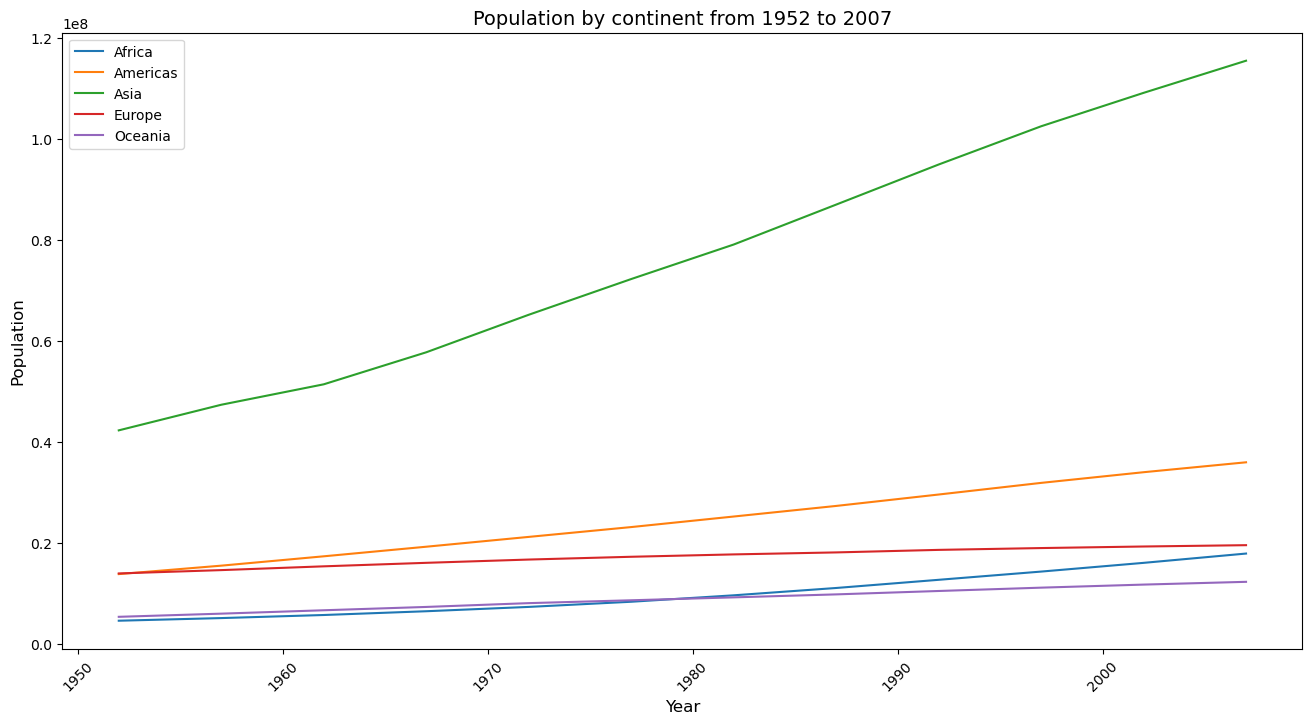

In [19]:
# Evolution of the population by continent from 1952 to 2007.
ax = (df
      .loc[:, ['year', 'continent', 'pop']]
      .groupby(['year', 'continent'])
      .mean('pop')
      .unstack('continent')
      .plot(rot=45, figsize=(16, 8))
      )
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population', fontsize=12)
ax.set_title('Population by continent from 1952 to 2007', fontsize=14)
ax.legend(sorted(df['continent'].unique()))


**4.4) Que pouvez vous conclure à partir de ce graphique ?**

(1 points) Je suis daltonien :( 
    J'en déduis qu'une droite a beaucoup plus augmentà comparé aux 4 autres qui restent relativement stables, je crois que c'est l'Asie qui augmente beaucoup ou tout du moins ça semble concordant avec ce qu'on a trouvé avec la méthode .diff()

*Réponse:*

**4.5) Décrivez chaque étape de transformation des données.**

(5 points)

Par exemple:

.loc[:, ['year', 'continent', 'pop']] : extrait les colonnes 'year' , 'continent' et 'pop' du dataFrame

.groupby(['year', 'continent']) : permet de grouper les valeurs de toutes les entrées correspondantes à la même valeur de 'year' et à la même valeur de 'continent'

.mean('pop') : permet de faire la moyenne des valeurs numériques de la colonne 'pop'

.unstack('continent') : extrait les valeurs de la colonne 'continent' pour en faire des colonnes ? Pas sûr à revoir plus tard

.plot() : permet de créer un graphique

*.loc[:, 'X'] : extrait la colonne "X" du DataFrame*

*.method : fait quelque chose*

...


*Réponse:*

**4.6) Affichez les données transformées qui sont passées à la fonction *plot()***. (recopiez simplement le bout de code concerné)

(2 points)

In [20]:
# Écrivez votre code ici:
(df
      .loc[:, ['year', 'continent', 'pop']]
      .groupby(['year', 'continent'])
      .mean('pop')
      .unstack('continent')
)


pop                                                     
continent        Africa     Americas          Asia        Europe     Oceania
year                                                                        
1952       4.570010e+06  13806097.84  4.228356e+07  1.393736e+07   5343003.0
1957       5.093033e+06  15478156.64  4.735699e+07  1.459635e+07   5970988.0
1962       5.702247e+06  17330810.16  5.140476e+07  1.534517e+07   6641759.0
1967       6.447875e+06  19229864.92  5.774736e+07  1.603930e+07   7300207.0
1972       7.305376e+06  21175368.40  6.518098e+07  1.668784e+07   8053050.0
1977       8.328097e+06  23122707.96  7.225799e+07  1.723882e+07   8619500.0
1982       9.602857e+06  25211636.80  7.909502e+07  1.770890e+07   9197425.0
1987       1.105450e+07  27310158.84  8.700669e+07  1.810314e+07   9787207.5
1992       1.267464e+07  29570964.16  9.494825e+07  1.860476e+07  10459825.5
1997       1.430448e+07  31876016.40  1.025238e+08  1.896480e+07  11120715.0
2002       1.603315e+07  33990910.48  1.091455e+08  1.927413e+07  11727414.5
2007       1.787576e+07  35954847.36  1.155138e+08  1.953662e+07  12274973.5

In [21]:
#SOLUTION

(df
      .loc[:, ['year', 'continent', 'pop']]
      .groupby(['year', 'continent'])
      .mean('pop')
      .unstack('continent'))

pop                                                     
continent        Africa     Americas          Asia        Europe     Oceania
year                                                                        
1952       4.570010e+06  13806097.84  4.228356e+07  1.393736e+07   5343003.0
1957       5.093033e+06  15478156.64  4.735699e+07  1.459635e+07   5970988.0
1962       5.702247e+06  17330810.16  5.140476e+07  1.534517e+07   6641759.0
1967       6.447875e+06  19229864.92  5.774736e+07  1.603930e+07   7300207.0
1972       7.305376e+06  21175368.40  6.518098e+07  1.668784e+07   8053050.0
1977       8.328097e+06  23122707.96  7.225799e+07  1.723882e+07   8619500.0
1982       9.602857e+06  25211636.80  7.909502e+07  1.770890e+07   9197425.0
1987       1.105450e+07  27310158.84  8.700669e+07  1.810314e+07   9787207.5
1992       1.267464e+07  29570964.16  9.494825e+07  1.860476e+07  10459825.5
1997       1.430448e+07  31876016.40  1.025238e+08  1.896480e+07  11120715.0
2002       1.603315e+07  33990910.48  1.091455e+08  1.927413e+07  11727414.5
2007       1.787576e+07  35954847.36  1.155138e+08  1.953662e+07  12274973.5

<div class="alert alert-block alert-info">
<b>Corrections 4.4 - 4.6: </b> Points obtenus: /8
</div>

Remarques: 

**4.7) Lisez attentivement le code du graphique suivant et ses commentaires. Ajoutez _une seule ligne_ pour définir comme taille de points du scatterplot, la population de chaque pays en million.**

(2 points)

Vous pouvez trouver le paramètre à ajouter dans [la doc](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html). 

Text(0.5, 0.98, 'Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007')

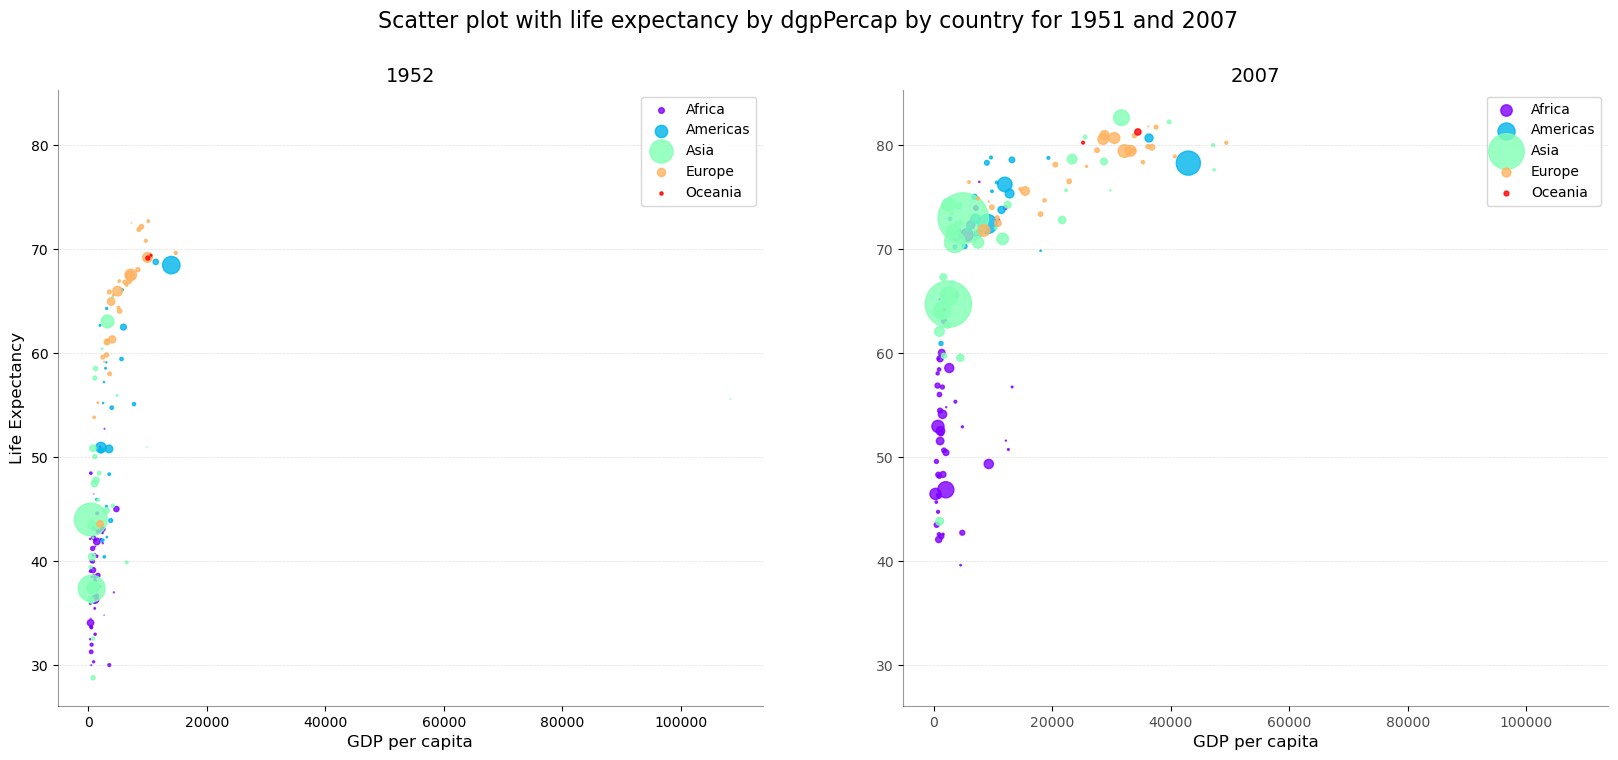

In [23]:
import matplotlib.cm as cm
NCOLORS = 5

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(20, 8))

# Colormap for the continents.
cmap = list(cm.get_cmap("rainbow")(np.linspace(0, 1, NCOLORS)))

# Vous pouvez aussi définir les couleurs manuellement
# cmap = ["black","red","yellow","blue","green"]


for i, year in enumerate((1952, 2007)):
    data = df.query('year == @year')
    
    # Plot each continent as a different color in order to have a legend. 
    
    # Observez bien: 
    # - la fonction ennumerate et ce qu'elle retourne
    #     La fonction ennumerate() renvoie un index en plus des éléments d'une liste. 
    #     Ici elle retourne c, l'index, ainsi qu'un tuple avec le groupe et le dataframe correspondant.
    #     Pour accéder à la population de chaque pays on peut par exemple utiliser df_continent['pop']
    
    for c, (continent, df_continent) in enumerate(data.groupby('continent')):
        
        
        # Scatterplot
        df_continent.plot.scatter(ax=axs[i], 
                                  x='gdpPercap', 
                                  y='lifeExp', 
                                  s = df_continent['pop'] / 1000000,
                                  color=[cmap[c]], 
                                  label=continent, 
                                  alpha=0.8
                                  )
    
    # Plot style
    
    axs[i].set_title(year, fontsize=14)
    axs[i].set_xlabel('GDP per capita', fontsize=12)
    axs[i].grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)
    
    
    # Remove border on the top and right.
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    # Set alpha on remaining borders.
    axs[i].spines['left'].set_alpha(0.4)
    axs[i].spines['bottom'].set_alpha(0.4)

    # Only show ticks on the left and bottom spines.
    axs[i].xaxis.set_ticks_position('bottom')
    axs[i].yaxis.set_ticks_position('left')
    # Style of ticks.
    plt.xticks(fontsize=10, alpha=0.7)
    plt.yticks(fontsize=10, alpha=0.7)
    
axs[0].set_ylabel('Life Expectancy', fontsize=12)
fig.suptitle('Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007', fontsize=16)


**4.8) Analyse: Décrivez cette figure et répondez aux questions suivantes:**

(5 points)

- Quel est le principal message transmi ? L'augmentation dans le temps de l'espérance de vie ainsi que le GDP per capita ainsi que la relation entre les deux. Plus le GDP per capita est élevé, plus l'espérance de vie est élevée
- Quelles informations peut-on y trouver ? On peut y trouver la taille relative de la population de chaque pays par la grosseur des points ainsi que la taille relative de la population des continents
- Est-ce un bon graphique ? Que pourrait-on ajouter / supprimer pour le rendre plus riche en information ou plus pertinent ? Je ne le trouve pas très lisible. Certains points cachent beaucoup les autres. Peut-être ajouter un graphe permettant de voir la même relation en se concentrant sur l'évolution dans le temps. 


*Réponses:*

<div class="alert alert-block alert-info">
<b>Corrections 4.7 - 4.8: </b> Points obtenus: /7
</div>

Remarques: 